## probelm

With the increase in online consumption of products and services, consumers are facing a huge problem of abundance of spam messages in their inboxes which are either promotional-based or fraudulent. But due to this the messages/Email which is of much importance are squashed under the spam messages.

In this article, we are going to create an SMS spam detection model which will help you to find whether an SMS is a spam or not using Naive Bayes and Natural Language Processing(NLP).

The SMS Spam Collection is a set of SMS tagged messages that have been collected for SMS Spam research. It contains one set of SMS messages in English of 5,574 messages, tagged acording being ham (legitimate) or spam.

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
df=pd.read_csv(r"C:\ds project\spam.csv",encoding='latin-1')
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


# Data Cleaning 

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


Removing the unwanted columns in the dataset (unnamed: 2,unnamed :3,unnamed:4)

In [4]:
# the above information shows that columns 2 3 4 have too much null values so it is good to drop it
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace= True)
#inplace= True because we permanently want to bring change in the original dataset
df.sample(10)

,v1,v2
416,ham,Alright i have a new goal now
5228,spam,PRIVATE! Your 2003 Account Statement for <fone...
1981,ham,"Sorry, I'll call later in meeting any thing re..."
4310,ham,It so happens that there r 2waxsto do wat you ...
1219,ham,True. It is passable. And if you get a high sc...
5072,ham,Gud ni8 dear..slp well..take care..swt dreams....
3463,ham,My phone
1940,ham,Dude avatar 3d was imp. At one point i thought...
2585,ham,I will be outside office take all from there
5095,ham,K.k.this month kotees birthday know?


In [5]:
# as the column names are not to descriptive lets rename the names of th columns
df.rename(columns={'v1':'Message_type','v2':'Message'},inplace=True)
df.sample(10)

,Message_type,Message
1693,ham,Was gr8 to see that message. So when r u leavi...
3742,ham,"Nah, Wednesday. When should I bring the mini c..."
66,ham,"Today is \song dedicated day..\"" Which song wi..."
4331,ham,ALSO TELL HIM I SAID HAPPY BIRTHDAY
4695,ham,A guy who gets used but is too dumb to realize...
2400,ham,Hi! This is Roger from CL. How are you?
1697,ham,Hai priya are you right. What doctor said pa. ...
282,ham,Ok. I asked for money how far
823,spam,25p 4 alfie Moon's Children in need song on ur...
3408,ham,Whats that coming over the hill..... Is it a m...


In [6]:
# in the message type, they are classified as 'ham' and 'spam' but we want it as 1 and O so lets import Label Encoder

 As this is a classification problem we want the “message_type” to be binary classified i.e, 0 or 1 so for this purpose we use label encoder.

In [7]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [8]:
df['Message_type']=encoder.fit_transform(df['Message_type'])
df['Message_type']

0       0
1       0
2       1
3       0
4       0
       ..
5567    1
5568    0
5569    0
5570    0
5571    0
Name: Message_type, Length: 5572, dtype: int32

In [9]:
df[df['Message_type']==1]
#there are 747 spam messages in the dataset

,Message_type,Message
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
5,1,FreeMsg Hey there darling it's been 3 week's n...
8,1,WINNER!! As a valued network customer you have...
9,1,Had your mobile 11 months or more? U R entitle...
11,1,"SIX chances to win CASH! From 100 to 20,000 po..."
...,...,...
5537,1,Want explicit SEX in 30 secs? Ring 02073162414...
5540,1,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...
5547,1,Had your contract mobile 11 Mnths? Latest Moto...
5566,1,REMINDER FROM O2: To get 2.50 pounds free call...


Checkin for any missing values and duplicates  in the dataset

In [10]:
df.isnull().sum()
#there is no missing values

Message_type    0
Message         0
dtype: int64

In [11]:
df.duplicated().sum()

403

In [12]:
# there are 403 duplicated values and we can remove them
df=df.drop_duplicates()

In [13]:
#df.duplicates()

# Exploratory Data Analysis

## Let’s visualise the classification problem to get a better understanding of the data.

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

In [15]:
df['Message_type'].value_counts()

Message_type
0    4516
1     653
Name: count, dtype: int64

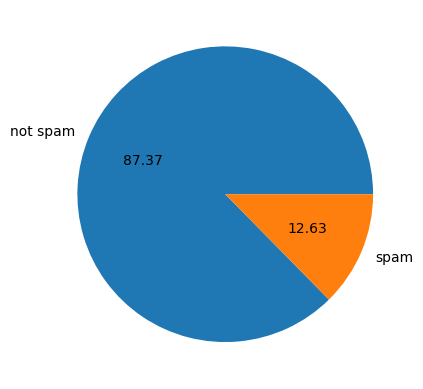

In [16]:
plt.pie(df['Message_type'].value_counts(),labels=['not spam','spam'],autopct='%0.2f')
plt.show()

## There is an imbalanced data

Now let’s find out :

1. No. of characters in the data
2. No. of words in the data
3. No. of sentences in the data
 
## now lets make  3 new columns in the data depicting the no. of character, words and sentences.

In [17]:
# for number of charceters
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\venga\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [18]:
df['num_characters']=df['Message'].apply(len)
df.head()

C:\Users\venga\AppData\Local\Temp\ipykernel_18036\1704919246.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_characters']=df['Message'].apply(len)


,Message_type,Message,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [19]:

#fetch number of words using NLTK
from nltk.tokenize import word_tokenize
#word tokenization
df['Message'].apply(lambda x: nltk.word_tokenize(x))


0       [Go, until, jurong, point, ,, crazy, .., Avail...
1                [Ok, lar, ..., Joking, wif, u, oni, ...]
2       [Free, entry, in, 2, a, wkly, comp, to, win, F...
3       [U, dun, say, so, early, hor, ..., U, c, alrea...
4       [Nah, I, do, n't, think, he, goes, to, usf, ,,...
                              ...                        
5567    [This, is, the, 2nd, time, we, have, tried, 2,...
5568     [Will, Ì_, b, going, to, esplanade, fr, home, ?]
5569    [Pity, ,, *, was, in, mood, for, that, ., So, ...
5570    [The, guy, did, some, bitching, but, I, acted,...
5571                  [Rofl, ., Its, true, to, its, name]
Name: Message, Length: 5169, dtype: object

In [20]:
# now find the length of each of the list to get the total numbernof words in each list 
df['num_words']=df['Message'].apply(lambda x:len(nltk.word_tokenize(x)))
df.head()

C:\Users\venga\AppData\Local\Temp\ipykernel_18036\1331208156.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_words']=df['Message'].apply(lambda x:len(nltk.word_tokenize(x)))


,Message_type,Message,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [21]:
# for number of sentences
df['num_sentences']=df['Message'].apply(lambda x:len(nltk.sent_tokenize(x)))
df.head()

C:\Users\venga\AppData\Local\Temp\ipykernel_18036\79397940.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_sentences']=df['Message'].apply(lambda x:len(nltk.sent_tokenize(x)))


,Message_type,Message,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [22]:
#lets test the describe function on the new 3 columns
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [23]:
# for 'Ham' message 
df[df['Message_type']==0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [24]:
# for 'spam' message 
df[df['Message_type']==1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


## we can clearly see that spam messages are quite longer than spam messages.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


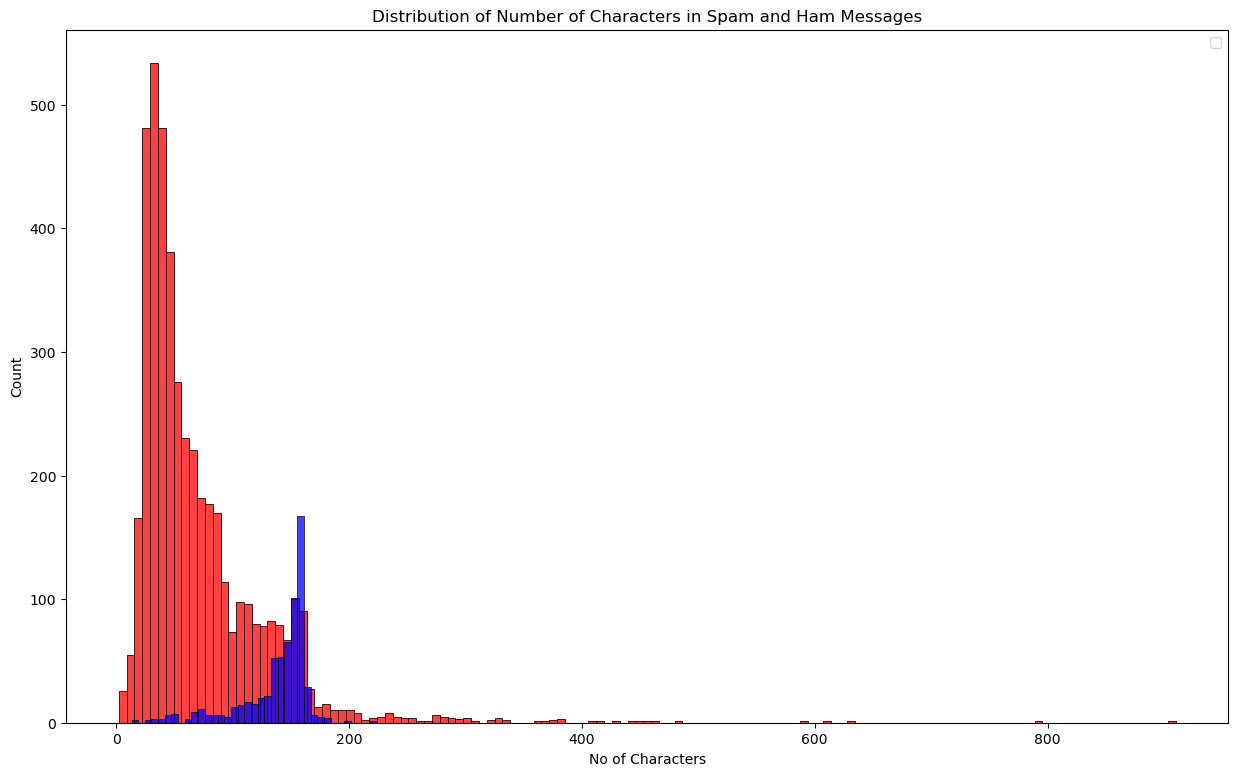

In [25]:
# for characters
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15,9))
sns.histplot(df[df['Message_type']==0]['num_characters'],color='red')
sns.histplot(df[df['Message_type']==1]['num_characters'],color='blue')
plt.xlabel('No of Characters')
plt.title('Distribution of Number of Characters in Spam and Ham Messages')
plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


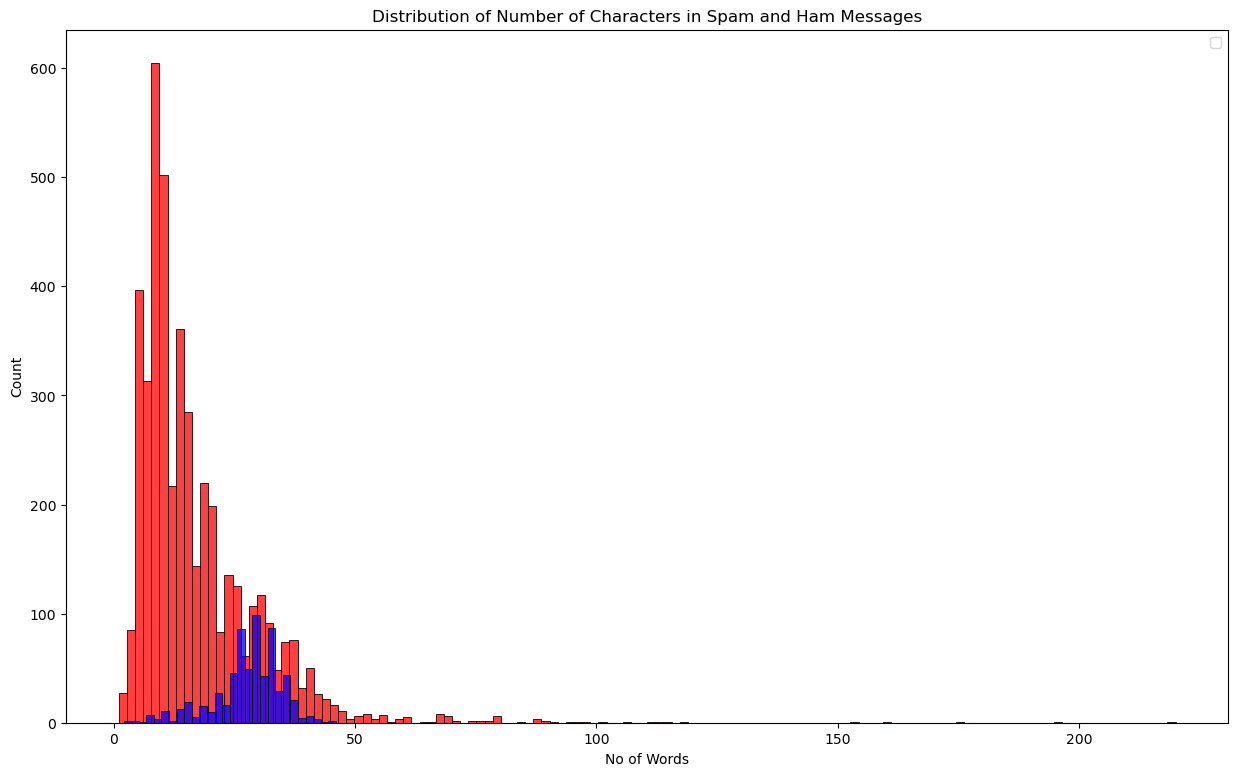

In [26]:
# for words
plt.figure(figsize=(15,9))
sns.histplot(df[df['Message_type']==0]['num_words'],color='red')
sns.histplot(df[df['Message_type']==1]['num_words'],color='blue')
plt.xlabel('No of Words')
plt.title('Distribution of Number of Characters in Spam and Ham Messages')
plt.legend()
plt.show()

C:\JUPYTER\anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


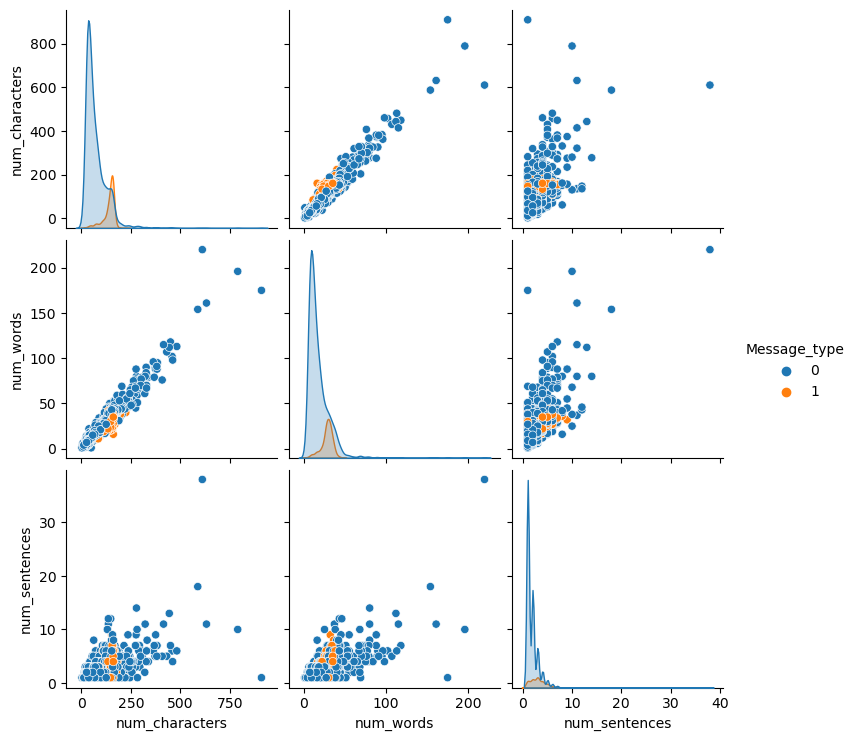

In [27]:
# plot pairplots for ham and spam
sns.pairplot(df,hue='Message_type')

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5169 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Message_type    5169 non-null   int32 
 1   Message         5169 non-null   object
 2   num_characters  5169 non-null   int64 
 3   num_words       5169 non-null   int64 
 4   num_sentences   5169 non-null   int64 
dtypes: int32(1), int64(3), object(1)
memory usage: 222.1+ KB


In [29]:
# Exclude non-numeric columns from the DataFrame before computing the correlation matrix
numeric_df = df.select_dtypes(include=['float64', 'int64','int32'])  # Select only numeric columns

# Compute the correlation matrix for the numeric DataFrame
correlation_matrix = numeric_df.corr()

# Display the correlation matrix
print(correlation_matrix)



                Message_type  num_characters  num_words  num_sentences
Message_type        1.000000        0.384717   0.262912       0.263939
num_characters      0.384717        1.000000   0.965760       0.624139
num_words           0.262912        0.965760   1.000000       0.679971
num_sentences       0.263939        0.624139   0.679971       1.000000


<Axes: >

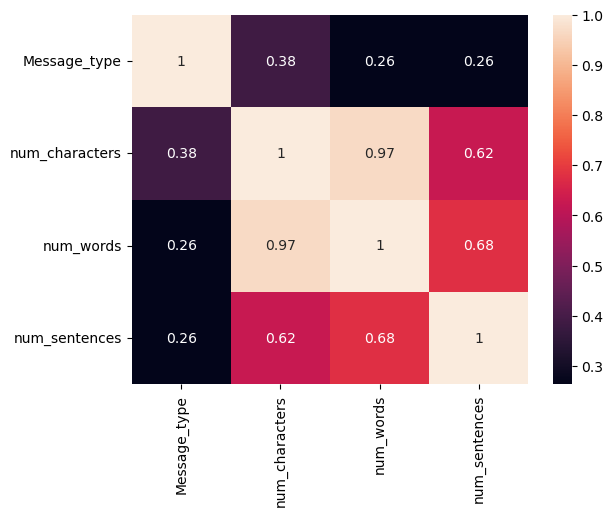

In [30]:
# plotting the heat map for correlation


numeric_df = df.select_dtypes(include=['float64', 'int64','int32'])  # Select only numeric columns
sns.heatmap(numeric_df.corr(), annot=True)


As we see multicollinearity here, we cannot use all three columns instead we shall use only one and that should be num_characters.

# Data Preprocessing
3.1 LowerCase

3.2 Tokenisation

3.3 Removing special characters

3.4 Removing stop words and punctuation

3.5 Stemming — lemmatisation

In [31]:
def text_transform(message):
    message=message.lower() #change to lowercase
    message=nltk.word_tokenize(message)#tokenization  and after that text is converted to a list
    #so we run a loop in the message text
    y=[] #creating empty list to append
    for i in message:
        if i.isalnum():
            y.append(i)
    #now lets assign the y list back to the message
    #message = y   !!!!list can never be copied this way it is immutable data type so we have to do it by CLONING
    message=y[:]
    y.clear() #now y is cleared
    
    #for checking punctuations and stopwords
    for i in message:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    message=y[:]
    y.clear()
    
    ##now stemming function
    for i in message:
        y.append(ps.stem(i))
    
    #return y  --> returns as list
    return " ".join(y)#returns in the form of string


In [32]:
# removing stop words and punctuation
import nltk
from nltk.corpus import stopwords
import string


In [33]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\venga\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [34]:
stopwords.words('english')


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [35]:
len(stopwords.words('english'))

179

In [36]:
 #text_transform("THis is a SMS spam CLassifier playing,wasn't $3000") ##see here the special

In [37]:
## Removing stop words and punctuations
from nltk.corpus import stopwords
stopwords.words('english')
len(stopwords.words('english')) #length of stopwords available

179

This shows there are 179 stopwords in the english language in this library

In [38]:
# now for punctuation
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [39]:
# stemming
from nltk.stem.porter import PorterStemmer
ps =PorterStemmer()
ps.stem('palying')

# we got the stemmed version of the word

'pali'

## Now let’s apply the text_transform function to all the messages in the dataset.

In [40]:
df['Message'].apply(text_transform)


0       go jurong point crazi avail bugi n great world...
1                                   ok lar joke wif u oni
2       free entri 2 wkli comp win fa cup final tkt 21...
3                     u dun say earli hor u c alreadi say
4                    nah think goe usf live around though
                              ...                        
5567    2nd time tri 2 contact u pound prize 2 claim e...
5568                                b go esplanad fr home
5569                                    piti mood suggest
5570    guy bitch act like interest buy someth els nex...
5571                                       rofl true name
Name: Message, Length: 5169, dtype: object

In [41]:
df['transformed_msg']=df['Message'].apply(text_transform)

C:\Users\venga\AppData\Local\Temp\ipykernel_18036\483341554.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['transformed_msg']=df['Message'].apply(text_transform)


In [42]:
df

,Message_type,Message,num_characters,num_words,num_sentences,transformed_msg
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though
...,...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,35,4,2nd time tri 2 contact u pound prize 2 claim e...
5568,0,Will Ì_ b going to esplanade fr home?,37,9,1,b go esplanad fr home
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2,piti mood suggest
5570,0,The guy did some bitching but I acted like i'd...,125,27,1,guy bitch act like interest buy someth els nex...


## Now we have to work basically on 2 columns the "transformed_msg" and "message_type"

In [43]:

#drawing a word cloud of maximum occuring words in the messages
from wordcloud import WordCloud
#create its object
wc=WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [44]:
# word cloud for spam
spam_wc=wc.generate(df[df['Message_type']==1]['transformed_msg'].str.cat(sep=""))

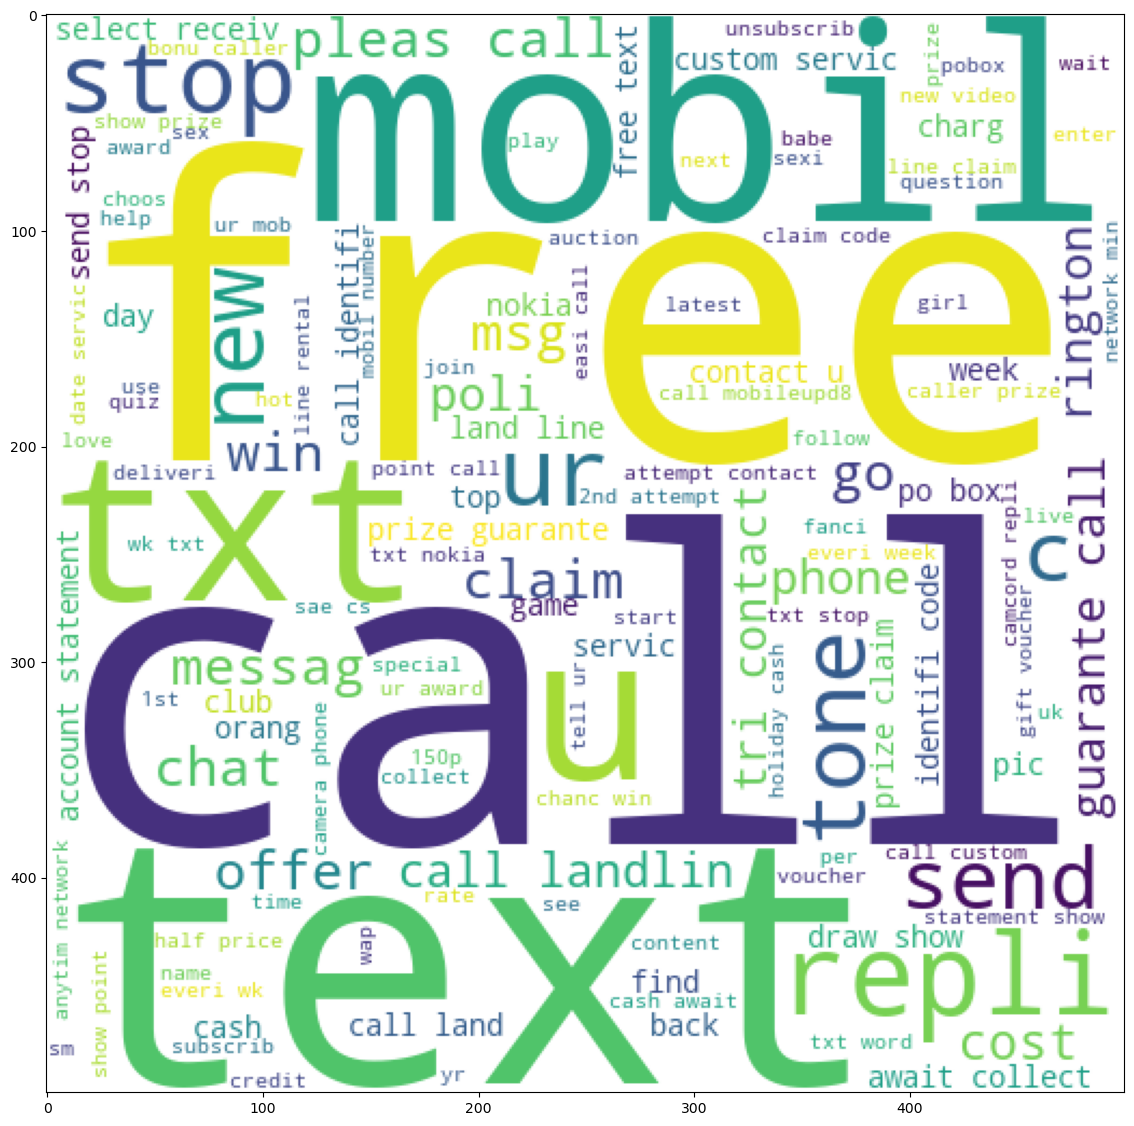

In [45]:
#display the world cloud---SPAM
plt.figure(figsize=(20,14))
plt.imshow(spam_wc)

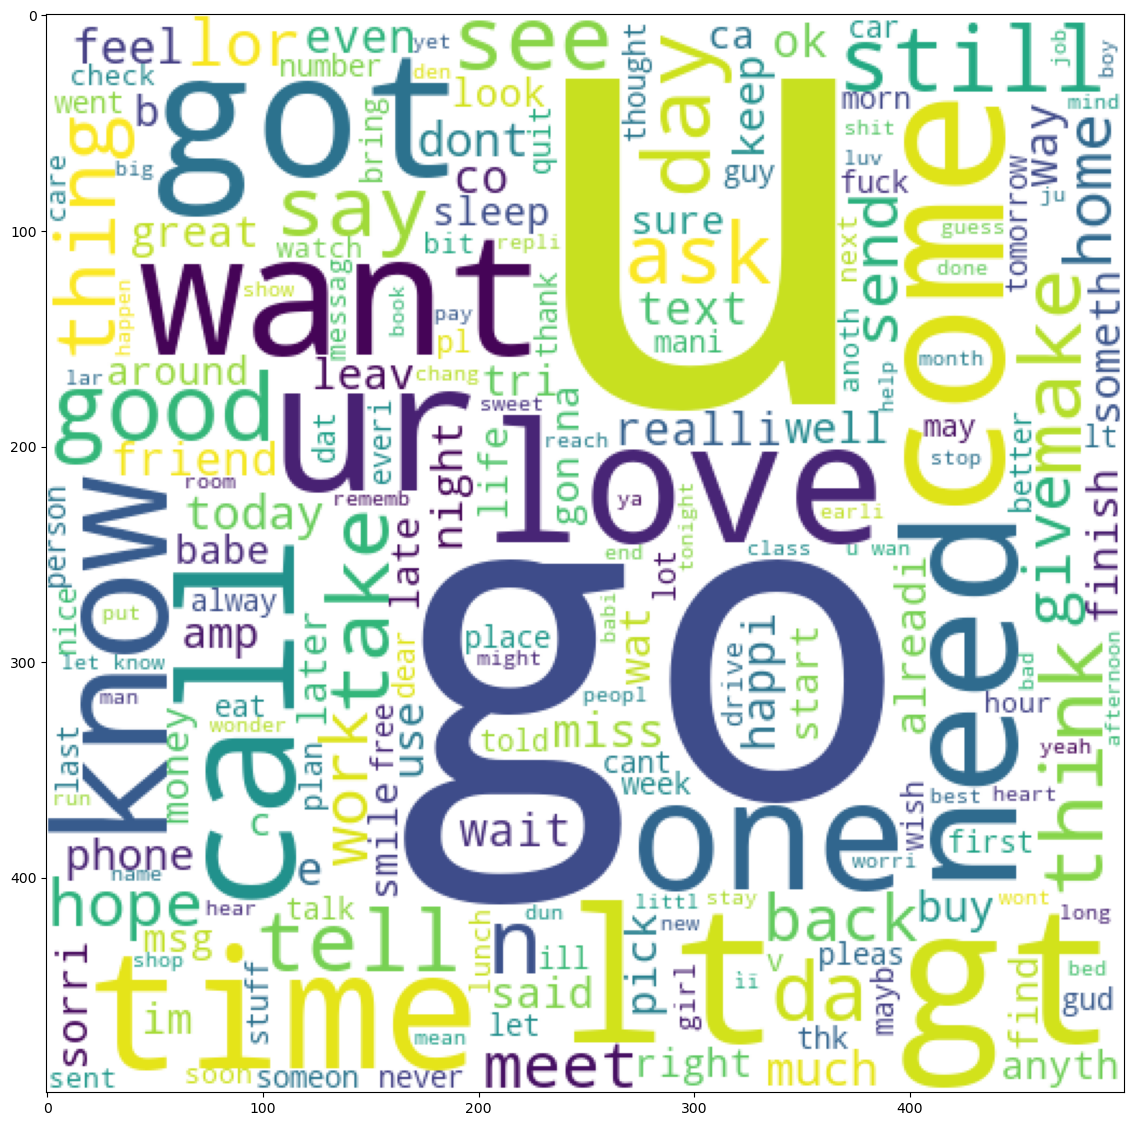

In [46]:
#dispaly the wortld cloud  for ham
ham_wc=wc.generate(df[df['Message_type']==0]['transformed_msg'].str.cat(sep=""))
plt.figure(figsize=(20,14))
plt.imshow(ham_wc)

## To simplify what is drawn inside the WordClouds we will find out the top 30 words used in both ham as well as spam messages.

In [47]:
##finding the top 30 words used in Ham and spam
##lets write a custom code for this
df[df['Message_type']==1]['transformed_msg'].tolist()

['free entri 2 wkli comp win fa cup final tkt 21st may text fa 87121 receiv entri question std txt rate c appli 08452810075over18',
 'freemsg hey darl 3 week word back like fun still tb ok xxx std chg send rcv',
 'winner valu network custom select receivea prize reward claim call claim code kl341 valid 12 hour',
 'mobil 11 month u r entitl updat latest colour mobil camera free call mobil updat co free 08002986030',
 'six chanc win cash 100 pound txt csh11 send cost 6day tsandc appli repli hl 4 info',
 'urgent 1 week free membership prize jackpot txt word claim 81010 c lccltd pobox 4403ldnw1a7rw18',
 'xxxmobilemovieclub use credit click wap link next txt messag click http',
 'england v macedonia dont miss news txt ur nation team 87077 eg england 87077 tri wale scotland poboxox36504w45wq',
 'thank subscript rington uk mobil charg pleas confirm repli ye repli charg',
 '07732584351 rodger burn msg tri call repli sm free nokia mobil free camcord pleas call 08000930705 deliveri tomorrow',
 '

In [48]:
##Lets print all the spam messages
spam_corpus=[]
for msg in df[df['Message_type']==1]['transformed_msg'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [49]:
 len(spam_corpus)

9939

In [50]:
## now lets find the most occuring words
from collections import Counter
Counter(spam_corpus)

Counter({'call': 320,
         'free': 191,
         '2': 155,
         'txt': 141,
         'text': 122,
         'u': 119,
         'ur': 119,
         'mobil': 114,
         'stop': 104,
         'repli': 103,
         'claim': 98,
         '4': 97,
         'prize': 82,
         'get': 74,
         'new': 64,
         'servic': 64,
         'tone': 63,
         'send': 60,
         'urgent': 57,
         'nokia': 57,
         'contact': 56,
         'award': 55,
         'phone': 52,
         'cash': 51,
         'pleas': 51,
         'week': 49,
         'win': 48,
         'c': 45,
         'collect': 45,
         'min': 45,
         'custom': 42,
         'messag': 42,
         'guarante': 42,
         'per': 41,
         'chat': 38,
         'tri': 37,
         'msg': 35,
         'draw': 35,
         'number': 35,
         'cs': 35,
         'show': 33,
         'today': 33,
         'offer': 33,
         'line': 33,
         'go': 32,
         'receiv': 31,
         'want': 3

In [51]:
#Top 30 
Counter(spam_corpus).most_common(30)

[('call', 320),
 ('free', 191),
 ('2', 155),
 ('txt', 141),
 ('text', 122),
 ('u', 119),
 ('ur', 119),
 ('mobil', 114),
 ('stop', 104),
 ('repli', 103),
 ('claim', 98),
 ('4', 97),
 ('prize', 82),
 ('get', 74),
 ('new', 64),
 ('servic', 64),
 ('tone', 63),
 ('send', 60),
 ('urgent', 57),
 ('nokia', 57),
 ('contact', 56),
 ('award', 55),
 ('phone', 52),
 ('cash', 51),
 ('pleas', 51),
 ('week', 49),
 ('win', 48),
 ('c', 45),
 ('collect', 45),
 ('min', 45)]

In [52]:
#Add those 30 words in one dataframe
pd.DataFrame(Counter(spam_corpus).most_common(30))

,0,1
0,call,320
1,free,191
2,2,155
3,txt,141
4,text,122
5,u,119
6,ur,119
7,mobil,114
8,stop,104
9,repli,103


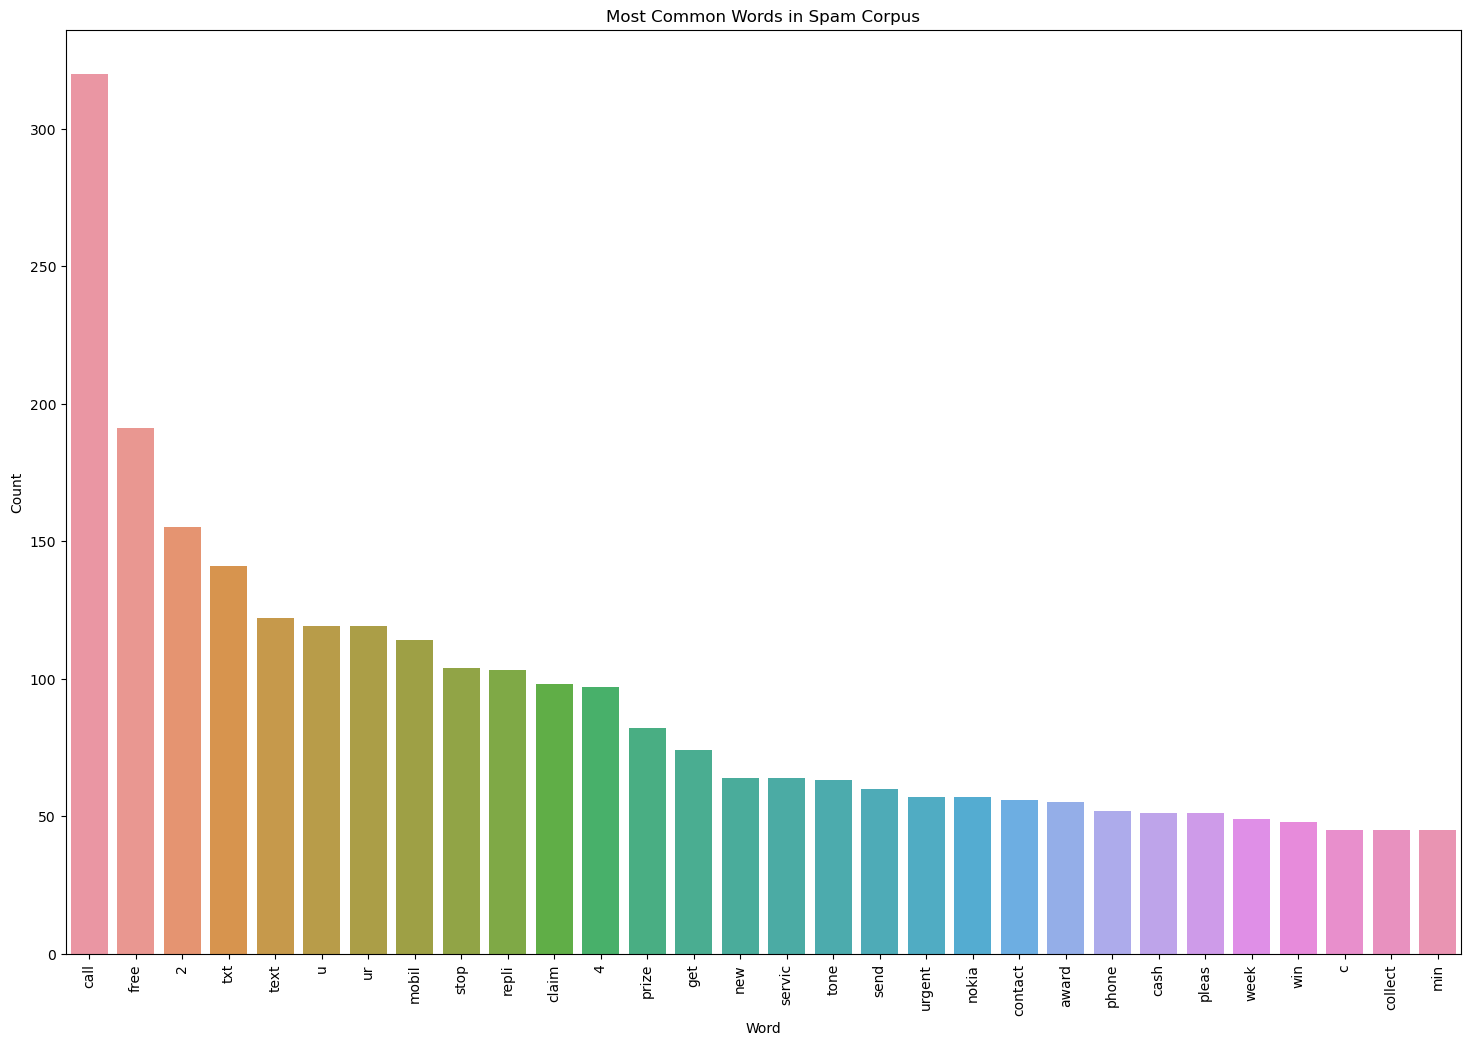

In [53]:


# Assuming you have spam_corpus containing the spam words and their counts
# Create a DataFrame from the Counter object
df_spam = pd.DataFrame(Counter(spam_corpus).most_common(30), columns=['Word', 'Count'])

# Plotting the barplot
plt.figure(figsize=(18, 12))
sns.barplot(x='Word', y='Count', data=df_spam)
plt.xticks(rotation='vertical')
plt.xlabel('Word')
plt.ylabel('Count')
plt.title('Most Common Words in Spam Corpus')
plt.show()


In [54]:
# Find top 30 words for HAM
ham_corpus=[]
for msg in df[df['Message_type']==0]['transformed_msg']:
    for word in msg.split():
        ham_corpus.append(word)

In [55]:
Counter(ham_corpus).most_common(30)


[('u', 883),
 ('go', 404),
 ('get', 349),
 ('gt', 288),
 ('lt', 287),
 ('2', 284),
 ('come', 275),
 ('got', 236),
 ('know', 236),
 ('like', 234),
 ('call', 233),
 ('time', 219),
 ('ok', 217),
 ('love', 216),
 ('good', 213),
 ('want', 208),
 ('ur', 197),
 ('day', 190),
 ('need', 170),
 ('one', 165),
 ('lor', 159),
 ('4', 156),
 ('home', 152),
 ('think', 149),
 ('see', 147),
 ('take', 143),
 ('still', 143),
 ('da', 142),
 ('tell', 133),
 ('make', 129)]

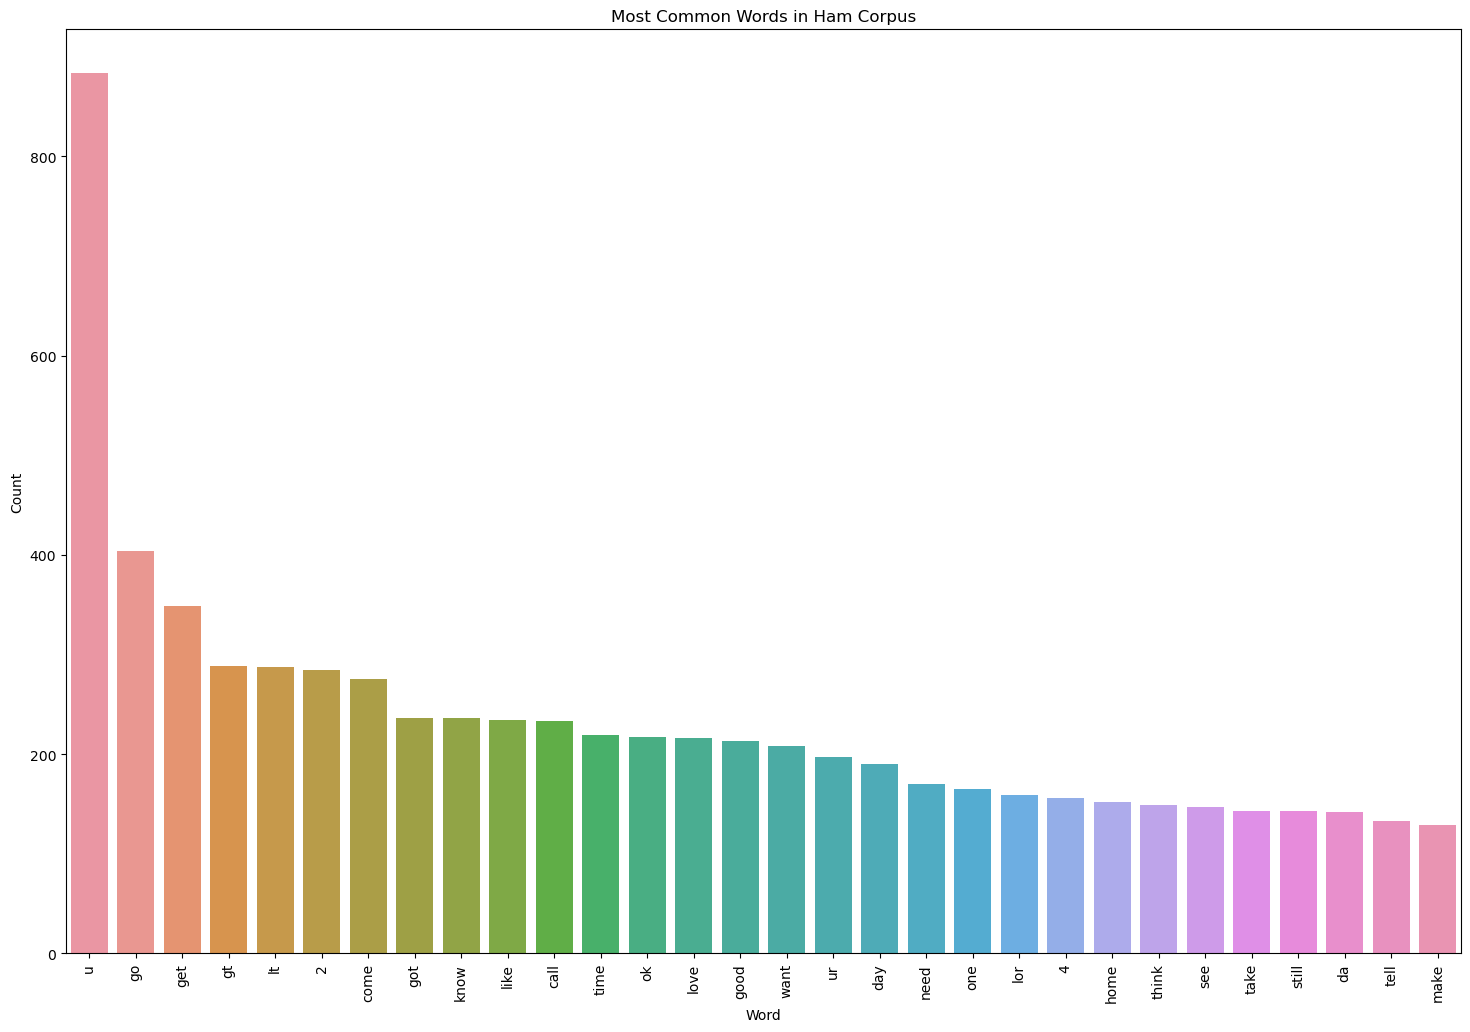

In [56]:


# Assuming you have ham_corpus containing the ham words and their counts
# Create a DataFrame from the Counter object
df_ham = pd.DataFrame(Counter(ham_corpus).most_common(30), columns=['Word', 'Count'])

# Plotting the barplot
plt.figure(figsize=(18, 12))
sns.barplot(x='Word', y='Count', data=df_ham)
plt.xticks(rotation='vertical')
plt.xlabel('Word')
plt.ylabel('Count')
plt.title('Most Common Words in Ham Corpus')
plt.show()


# Building a Model using Naive Bayes

##### As it is known that on Textual Data Naive Bayes Algorithm works the best hence we will use it but along the way also compare it with different algorithms

Input is categorical Output is Numerical.

But as we know in the Naive Bayes algorithm the input columns should be numerical so we have to convert (VECTORIZE) the column.

# How to vectorize:
 Bag of Words
 
 TFIDF
 
 Word2vec
 
 After trying out different techniques, I came to the conclusion that TFIDF vectorization gives the best accuracy and precision  score so we will be using it.

### Here we will be using BAG OF WORDS

In [57]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=3000)

In [58]:
from sklearn.feature_extraction.text import CountVectorizer

# Create an instance of CountVectorizer
cv = CountVectorizer()

# Fit-transform the 'transformed_msg' column of your DataFrame
X = cv.fit_transform(df['transformed_msg']).toarray()



In [59]:
X.shape

(5169, 6708)

5169 SMS 6629 Words

In [60]:
y=df['Message_type'].values

##### Now we'll do TRAIN TEST  SPLIT

In [61]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf= TfidfVectorizer(max_features=3000) 
X=tfidf.fit_transform(df['transformed_msg']).toarray()
y=df['Message_type'].values
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [62]:
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score

In [63]:
gnb=GaussianNB()
bnb=BernoulliNB()
mnb=MultinomialNB()

Now find out the Accuracy score, confusion Matrix and Precision Score of all 3 types of Naive Bayes:

In [64]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score
from sklearn.naive_bayes import GaussianNB


In [65]:
mnb.fit(X_train,y_train)
y_pred2=mnb.predict(X_test)
print('Accuracy score of Multinomial NB is: ',accuracy_score(y_test,y_pred2))
print('Confusion Matrix of Multinomial NB is: ',confusion_matrix(y_test,y_pred2))
print('Precision score of the Multinomial NB is',precision_score(y_test,y_pred2))


Accuracy score of Multinomial NB is:  0.9709864603481625
Confusion Matrix of Multinomial NB is:  [[896   0]
 [ 30 108]]
Precision score of the Multinomial NB is 1.0


###### Here the precision comes out to be 1 which proves very good for our model as there will be no “FALSE POSITIVES”

In [66]:
bnb.fit(X_train,y_train)
y_pred3=bnb.predict(X_test)
print('Accuracy score of Bernoulli NB is: ',accuracy_score(y_test,y_pred3))
print('Confusion Matrix of Bernoulli NB is: ',confusion_matrix(y_test,y_pred3))
print('Precision score of the Bernoulli NB is',precision_score(y_test,y_pred3))


Accuracy score of Bernoulli NB is:  0.9835589941972921
Confusion Matrix of Bernoulli NB is:  [[895   1]
 [ 16 122]]
Precision score of the Bernoulli NB is 0.991869918699187


Here the precision comes out to be 1 which proves very good for our model as there will be no “FALSE POSITIVES”.

Hence we finalise the Model with MNB(Multinomial Naive Bayes) and TFIDF Vectorization.

In [67]:

# Assuming you have already split your data into training and testing sets (X_train, X_test, y_train, y_test)

# Create and train the Gaussian Naive Bayes classifier
gnb = GaussianNB()
gnb.fit(X_train, y_train)

# Make predictions on the test data
y_pred = gnb.predict(X_test)

# Compute accuracy score
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy score of Gaussian NB:', accuracy)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix of Gaussian NB:')
print(cm)

# Compute precision score
precision = precision_score(y_test, y_pred)
print('Precision score of Gaussian NB:', precision)



Accuracy score of Gaussian NB: 0.8694390715667312
Confusion Matrix of Gaussian NB:
[[788 108]
 [ 27 111]]
Precision score of Gaussian NB: 0.5068493150684932


### We are chosing MNB with TFIDF

#### Lets compare other classification algorithms with MNB

In [68]:
#!pip install xgboost

In [69]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [70]:
#Creating objects of every algorithm
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [71]:
# create a dictionary of classifiers
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [72]:

def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [73]:
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.9758220502901354, 0.9747899159663865)

In [74]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9758220502901354
Precision -  0.9747899159663865
For  KN
Accuracy -  0.9052224371373307
Precision -  1.0
For  NB
Accuracy -  0.9709864603481625
Precision -  1.0
For  DT
Accuracy -  0.9274661508704062
Precision -  0.8118811881188119
For  LR
Accuracy -  0.9584139264990329
Precision -  0.9702970297029703
For  RF
Accuracy -  0.9758220502901354
Precision -  0.9829059829059829
For  AdaBoost
Accuracy -  0.960348162475822
Precision -  0.9292035398230089
For  BgC
Accuracy -  0.9584139264990329
Precision -  0.8682170542635659
For  ETC
Accuracy -  0.9748549323017408
Precision -  0.9745762711864406
For  GBDT
Accuracy -  0.9468085106382979
Precision -  0.9191919191919192
For  xgb
Accuracy -  0.9671179883945842
Precision -  0.9262295081967213


In [75]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.905222,1.000000
2,NB,0.970986,1.000000
5,RF,0.975822,0.982906
0,SVC,0.975822,0.974790
8,ETC,0.974855,0.974576
4,LR,0.958414,0.970297
6,AdaBoost,0.960348,0.929204
10,xgb,0.967118,0.926230
9,GBDT,0.946809,0.919192
7,BgC,0.958414,0.868217


In [76]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")
performance_df1

,Algorithm,variable,value
0,KN,Accuracy,0.905222
1,NB,Accuracy,0.970986
2,RF,Accuracy,0.975822
3,SVC,Accuracy,0.975822
4,ETC,Accuracy,0.974855
5,LR,Accuracy,0.958414
6,AdaBoost,Accuracy,0.960348
7,xgb,Accuracy,0.967118
8,GBDT,Accuracy,0.946809
9,BgC,Accuracy,0.958414


C:\JUPYTER\anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


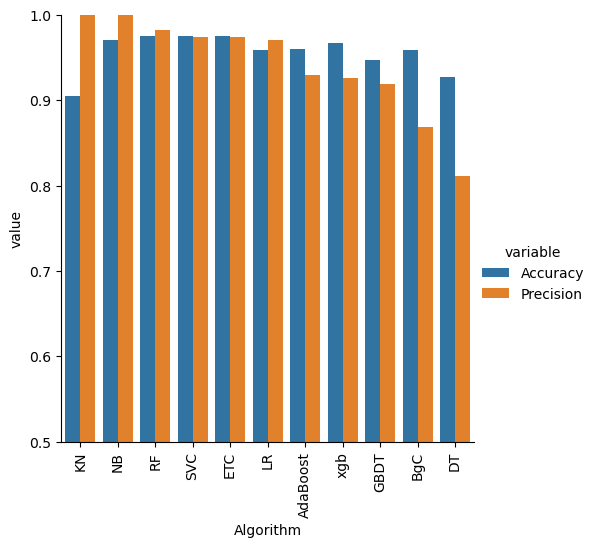

In [77]:
sns.catplot(x = 'Algorithm', y='value', 
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

# Model Improvement

### Change the parameter max_features in TFIDF

In [78]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)

In [79]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_scaling':accuracy_scores,'Precision_scaling':precision_scores}).sort_values('Precision_scaling',ascending=False)

In [80]:
new_df = performance_df.merge(temp_df,on='Algorithm')

In [81]:
new_df_scaled = new_df.merge(temp_df,on='Algorithm')

In [82]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_num_chars':accuracy_scores,'Precision_num_chars':precision_scores}).sort_values('Precision_num_chars',ascending=False)

In [83]:
new_df_scaled.merge(temp_df,on='Algorithm')

,Algorithm,Accuracy,Precision,Accuracy_scaling_x,Precision_scaling_x,Accuracy_scaling_y,Precision_scaling_y,Accuracy_num_chars,Precision_num_chars
0,KN,0.905222,1.000000,0.905222,1.000000,0.905222,1.000000,0.905222,1.000000
1,NB,0.970986,1.000000,0.970986,1.000000,0.970986,1.000000,0.970986,1.000000
2,RF,0.975822,0.982906,0.975822,0.982906,0.975822,0.982906,0.975822,0.982906
3,SVC,0.975822,0.974790,0.975822,0.974790,0.975822,0.974790,0.975822,0.974790
4,ETC,0.974855,0.974576,0.974855,0.974576,0.974855,0.974576,0.974855,0.974576
5,LR,0.958414,0.970297,0.958414,0.970297,0.958414,0.970297,0.958414,0.970297
6,AdaBoost,0.960348,0.929204,0.960348,0.929204,0.960348,0.929204,0.960348,0.929204
7,xgb,0.967118,0.926230,0.967118,0.926230,0.967118,0.926230,0.967118,0.926230
8,GBDT,0.946809,0.919192,0.946809,0.919192,0.946809,0.919192,0.946809,0.919192
9,BgC,0.958414,0.868217,0.958414,0.868217,0.958414,0.868217,0.958414,0.868217


### After a lot of experiments and improvement, we have trained our model to get an Accuracy score of 97% and a precision Score of 100%.

# Building a Website

In [84]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
#wb --> write binary
pickle.dump(mnb,open('model.pkl','wb'))

##### 2 files will be formed named “model.pkl” and “vectorizer.pkl”.

Open your IDE and create your own virtual environment. Install all the dependencies required using pip or conda. We will be building our website using streamlit so make sure that you download it too.

After the setup is ready make a file by “app.py”.

In [85]:
#!pip install streamlit

2024-05-02 10:31:55.561 
  command:

    streamlit run C:\JUPYTER\anaconda\Lib\site-packages\ipykernel_launcher.py [ARGUMENTS]
